<a href="https://colab.research.google.com/github/roverdp/Galaxias_Exploracion_Visualizacion/blob/main/An%C3%A1lisis__Vizualizaci%C3%B3n__Datos_Gal%C3%A1xias_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis y Visualización de Datos


**Objetivo y alcance:**

Se introducirá la inspección y visualización de la estadística descriptiva, estadística inferencial y probabilidad conjunta para cada una de las variables físicas de las galaxias, herramientas suficientes para determinar la distribución y estadisticos de las cantidades físicas que caracterizan al dataset y como éstas están relacionadas.




- Presentación de los datos;
- Visualización de datos categóricos y numéricos;
- Valores explícitos característicos de la distribución de algunas de las variables;
- Vizualización de la distribución con los valores característicos de la misma;
- Ajuste de la distribución a una Normal;
- Examinación de distribuciones de probabilidades discretas y continuas;
- Correlación entre las variables;
- Visualización de correlación entre variables usando mapas de calor;
- Conclusiones.

## Conjunto de datos

El conjunto de datos fue obtenido a partir del Sloan Digital Sky Survey (link). El mismo contiene información de 89051 galaxias.

El *dataset* contiene las siguientes columnas:

- **rac y dec** = Posición angular, rac de 0 a 360 y dec de -90 a 90
- **Mag_u,Mag_g,Mag_r,Mag_i,Mag_z**= Estas variables representan una fracción de la luz total que observamos de las galaxias según su frecuencia (como por ejemplo, la frecuencia de radio, para más información [wiki](https://es.wikipedia.org/wiki/Espectro_visible))
- **z** = Es una medida de la distancia a la que se encuentra la galaxia
- **R** = Es una medida del tamaño de la galaxia
- **color**= Como su nombre lo indica es el color más predominante en la galaxia
- **elíptica, espiral, irregular**= Estas columnas identifican el tipo de morfología de las galaxias. Si el valor de una de estas tres columnas es 1, entonces la galaxia tiene esa morfología y las dos restantes tendran el valor 0.

# Paquetes

In [2]:
import pandas as pd
df = pd.DataFrame({'a': [1,2,3], 'b': [4,5,6]})
df2 = df # Asignación peligrosa!!!
df2['a'] = 0 # Modifico df2 y se modifica df!!!
print(df)

   a  b
0  0  4
1  0  5
2  0  6
   a  b
0  0  4
1  0  5
2  0  6


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import numpy as np
import matplotlib.patches as mpatches
from scipy.stats import chi2_contingency

In [4]:
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy import units
#from astroquery.skyview import SkyView
from astropy import units as u

# Carga de Datos

In [5]:
# Acá deberían leer el conjunto de datos que ya tienen.
url = 'https://raw.githubusercontent.com/roverdp/Galaxias_Exploracion_Visualizacion/main/galaxias.csv'
data = pd.read_csv(url,
                   sep=',')

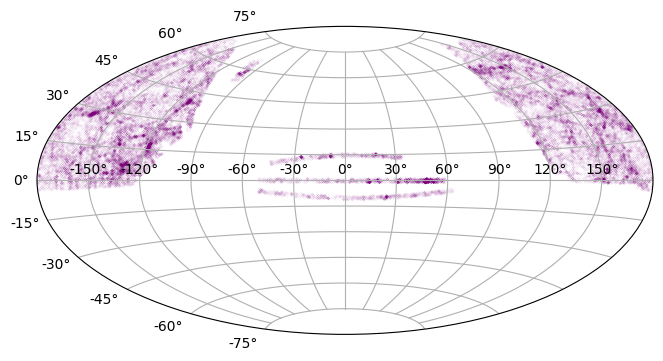

In [6]:
fig = plt.figure(figsize=(8, 4))
fig.add_subplot(111, projection='aitoff')
plt.grid(True)

########################### gx ##########################
coords_gx = SkyCoord(data.ra, data.dec, unit='degree')
ra_gx = coords_gx.ra.wrap_at(180*  units.deg).radian
dec_gx = coords_gx.dec.radian
plt.scatter(ra_gx,dec_gx,marker='.',color='purple',s=0.001)

In [7]:
data.head(4)

,ra,dec,Mag_u,Mag_g,Mag_r,Mag_i,Mag_z,R,z,color,eliptica,espiral,irregular
0,124.681690,51.782638,18.88496,17.75081,17.43881,17.23038,17.13276,6.112216,0.042512,-1.446144,0,0,1
1,128.676351,51.973910,20.20252,18.14648,17.51353,17.13207,16.83231,6.618816,0.049901,-2.688982,0,1,0
2,131.396389,53.550571,18.85028,17.48945,16.96463,16.68431,16.50479,10.350600,0.045041,-1.885653,0,1,0
3,129.384163,55.251341,19.29007,17.38153,16.52590,16.11502,15.78828,5.981402,0.045485,-2.764166,0,0,1


In [8]:
data.shape

(92102, 13)

In [9]:
data.describe()

,ra,dec,Mag_u,Mag_g,Mag_r,Mag_i,Mag_z,R,z,color,eliptica,espiral,irregular
count,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000,92102.000000
mean,181.086338,24.723737,18.143378,16.708392,16.312647,15.991780,15.433421,9.459875,0.036092,-1.830732,0.089651,0.326225,0.584124
std,61.177151,18.853785,46.690487,46.684358,1.092588,1.151259,57.168725,5.248708,0.008435,46.686363,0.285682,0.468833,0.492875
min,0.008745,-11.202394,-9999.000000,-9999.000000,11.524090,11.220580,-9999.000000,0.842248,0.020001,-13.484570,0.000000,0.000000,0.000000
25%,150.287271,9.115292,17.725203,16.251015,15.562648,15.197173,14.910782,6.117609,0.029082,-2.510555,0.000000,0.000000,0.000000
50%,183.219954,23.111344,18.442490,17.082385,16.491180,16.171225,15.934050,8.361149,0.036321,-1.994779,0.000000,0.000000,1.000000
75%,222.722975,38.982500,19.028265,17.720817,17.209298,16.928400,16.736465,11.345535,0.043620,-1.606971,0.000000,1.000000,1.000000
max,359.965567,70.133213,28.787190,25.526970,27.911470,25.657780,26.923540,231.121800,0.050000,10015.860000,1.000000,1.000000,1.000000


En la descripción se puede observar valores mínimos y máximos muy alejados a la media de los datos en las siguientes variables:

- Mag_u
- Mag_g
- Mag_z
- R
- color

Se puede observar valores de std grandes en comparacion con el promedio.

Y para las variables rac y dec (posición angular), rac va de 0° a 360° y dec de -90° a 90°, estan bien definidas a simple vista.

# Clases

Defino una nueva columna de tipo categórico para concatenar la clase o tipo morfologíco de las galaxias.

In [10]:
clase=[]                                   # Lista vacia
for i in range(0,data.shape[0]):
    if data.eliptica[i]==1:
        clase.append('E')
    elif data.espiral[i]==1:
        clase.append('S')
    elif data.irregular[i]==1:
        clase.append('I')
data['clase']=clase
data.head(2)

,ra,dec,Mag_u,Mag_g,Mag_r,Mag_i,Mag_z,R,z,color,eliptica,espiral,irregular,clase
0,124.681690,51.782638,18.88496,17.75081,17.43881,17.23038,17.13276,6.112216,0.042512,-1.446144,0,0,1,I
1,128.676351,51.973910,20.20252,18.14648,17.51353,17.13207,16.83231,6.618816,0.049901,-2.688982,0,1,0,S


In [11]:
# Contar los valores NaN en cada columna
nan_count = data.isna().sum()
print(nan_count)

ra           0
dec          0
Mag_u        0
Mag_g        0
Mag_r        0
Mag_i        0
Mag_z        0
R            0
z            0
color        0
eliptica     0
espiral      0
irregular    0
clase        0
dtype: int64


# Visualización

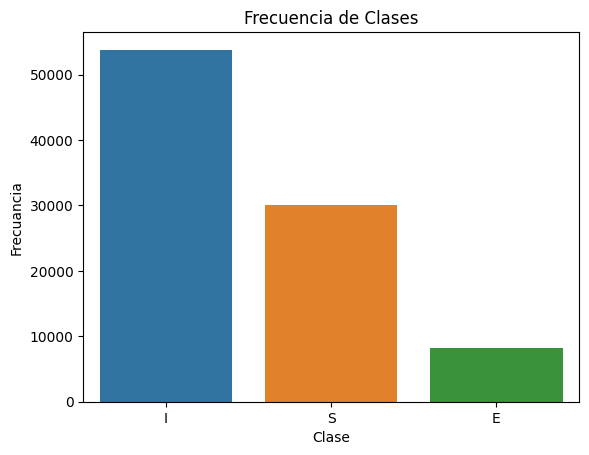

In [12]:
# Graficar la frecuencia de la columna utilizando Seaborn
sns.countplot(x='clase', data=data)
plt.title('Frecuencia de Clases')
plt.xlabel('Clase')
plt.ylabel('Frecuancia')
plt.show()

###Galaxias elípticas

In [13]:
#Condición para extraer solo las elipticas
galaxy_e = data.where(data["eliptica"]== 1)
galaxy_s = data.where(data["espiral"]== 1)
galaxy_i = data.where(data["irregular"]== 1)

cdf = pd.concat(
   [galaxy_e.z.describe(),
    galaxy_e.R.describe()],
    axis=1, keys=['z', 'R'])

cdf

,z,R
count,8257.000000,8257.000000
mean,0.035441,11.434267
std,0.008377,6.569001
min,0.020001,1.423474
25%,0.028338,7.127408
50%,0.035387,9.830194
75%,0.042901,13.911130
max,0.049999,87.420200


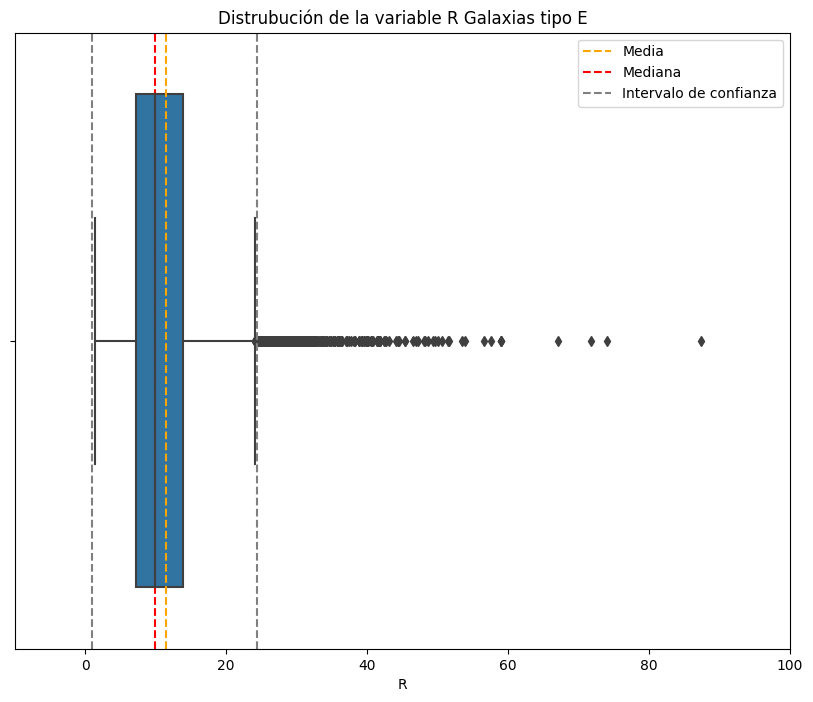

In [14]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear el boxplot con el eje x
sns.boxplot(data=galaxy_e, x='R')

# Agregar la línea de la media
plt.axvline(x=galaxy_e['R'].mean(), color='orange', linestyle='--', label='Media')

# Agregar la línea de la mediana
plt.axvline(x=galaxy_e['R'].median(), color='red', linestyle='--', label='Mediana')

# Calcular los límites del intervalo de confianza
q1 = data['R'].quantile(0.25)
q3 = data['R'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1 * iqr
upper_bound = q3 + 2.5 * iqr

# Mostrar los límites del intervalo de confianza
plt.axvline(x=lower_bound, color='gray', linestyle='--', label='Intervalo de confianza')
plt.axvline(x=upper_bound, color='gray', linestyle='--')

# Configurar el título y las etiquetas de los ejes
plt.title('Distrubución de la variable R Galaxias tipo E')
plt.xlim(-10,100)
plt.legend()
plt.show()

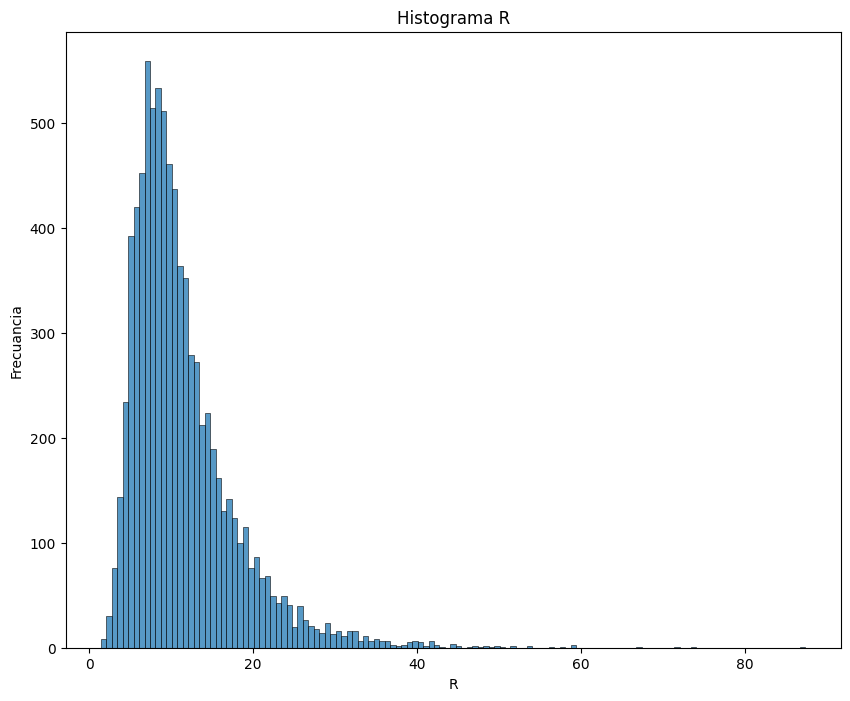

In [15]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 8))
sns.histplot(x=galaxy_e['R'])
plt.title('Histograma R')
plt.xlabel('R')
plt.ylabel('Frecuancia')

plt.show()

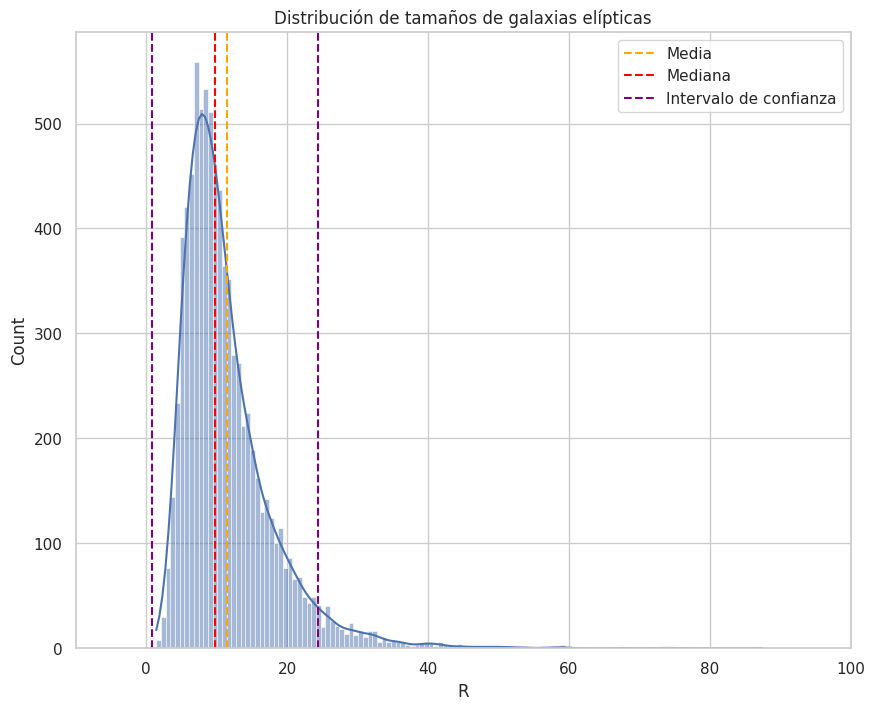

In [16]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Configuración de estilo de los gráficos
sns.set(style='whitegrid')

# Crear el boxplot con el eje x
sns.histplot(data=galaxy_e, x='R', kde=True) #kde=True se utiliza para  representar una curva suave que estima la forma de la distribución de los datos.

# Agregar la línea de la media
plt.axvline(x=galaxy_e['R'].mean(), color='orange', linestyle='--', label='Media')

# Agregar la línea de la mediana
plt.axvline(x=galaxy_e['R'].median(), color='red', linestyle='--', label='Mediana')

# Calcular los límites del intervalo de confianza
q1 = data['R'].quantile(0.25)
q3 = data['R'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1 * iqr
upper_bound = q3 + 2.5 * iqr

# Intervalo de confianza ()
plt.axvline(x=lower_bound, color='purple', linestyle='--', label='Intervalo de confianza')
plt.axvline(x=upper_bound, color='purple', linestyle='--')

plt.xlim(-10,100)
plt.title('Distribución de tamaños de galaxias elípticas')
plt.legend()
plt.show()

La media es influenciada por los valores atípicos. Existen varios valores por fuera del intervalo de confianza descripto.

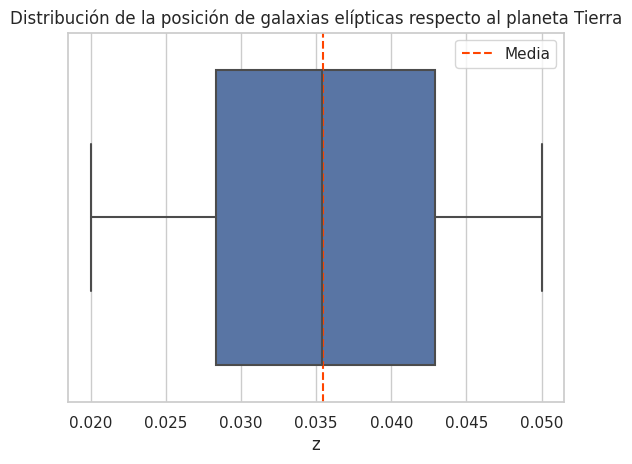

In [17]:
sns.boxplot(x=galaxy_e['z'])
plt.axvline(x=galaxy_e['z'].mean(), color='orangered', linestyle='--', label='Media')
plt.title('Distribución de la posición de galaxias elípticas respecto al planeta Tierra')
plt.legend()
plt.show()

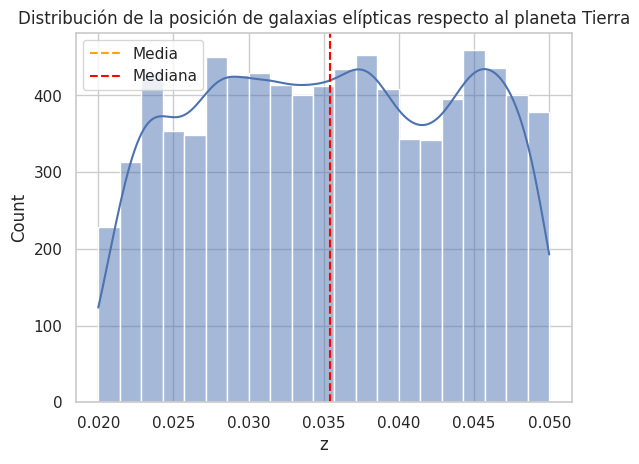

In [18]:
# Crear el boxplot con el eje x
sns.histplot(data=galaxy_e, x='z', kde=True)

# Agregar la línea de la media
plt.axvline(x=galaxy_e['z'].mean(), color='orange', linestyle='--', label='Media')

# Agregar la línea de la mediana
plt.axvline(x=galaxy_e['z'].median(), color='red', linestyle='--', label='Mediana')

plt.title('Distribución de la posición de galaxias elípticas respecto al planeta Tierra')
plt.legend()
plt.show()

La media es practicamente igual a la mediana, es decir, que la distribución de los datos tiende a ser simétrica, tanto la media como la mediana representan bien el valor típico o central de los datos. Su distribucion tiene forma uniforme.

## Tipos de distribuciones

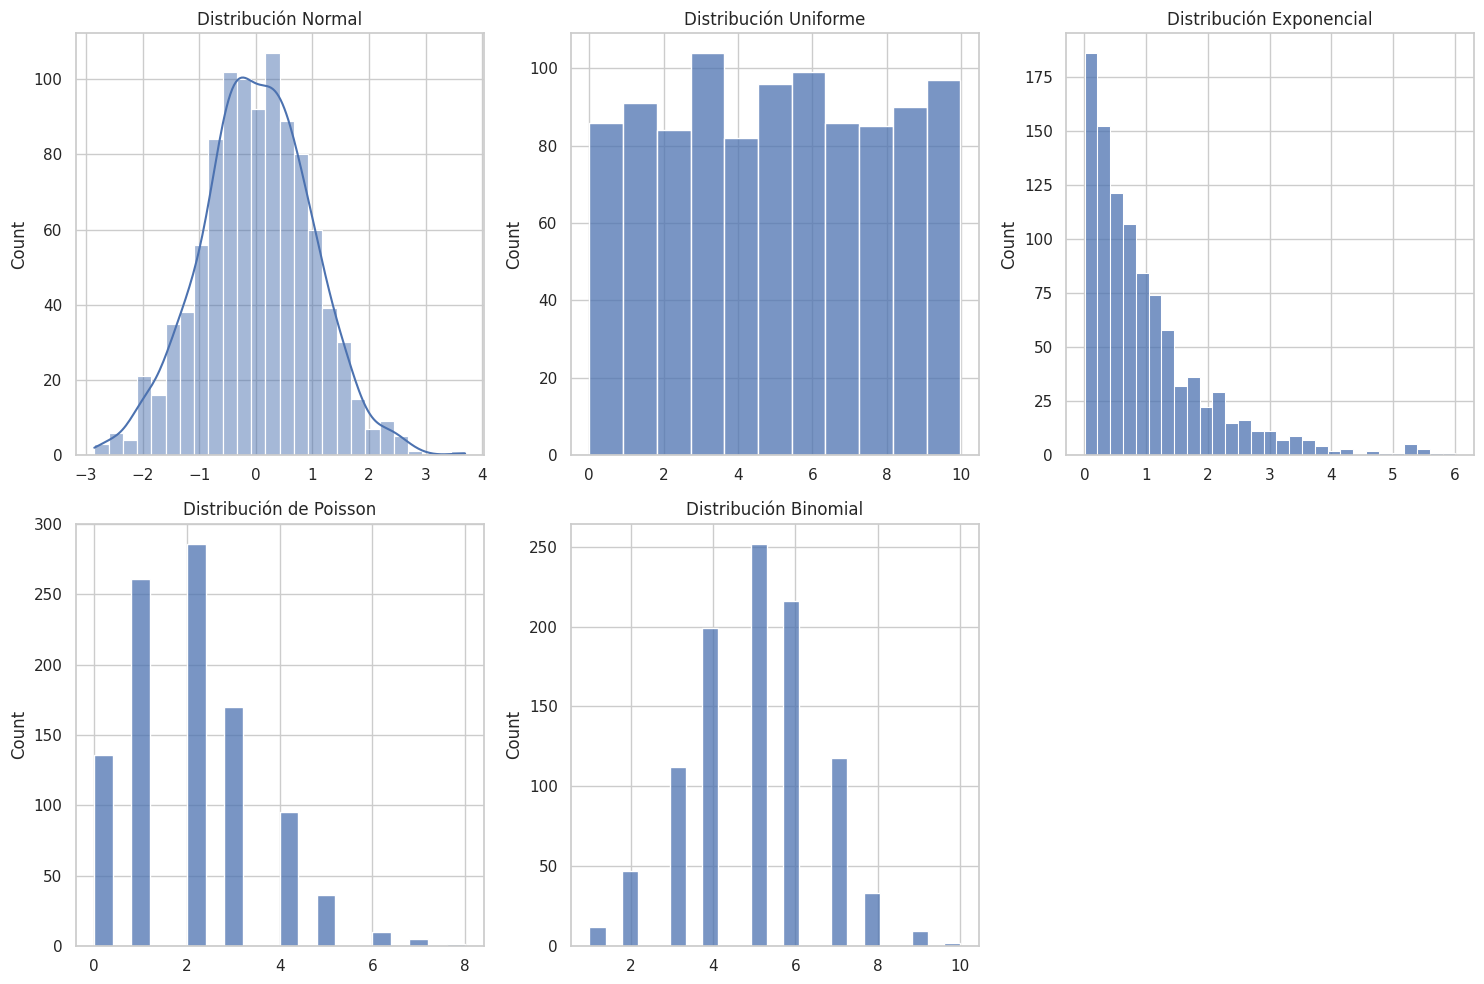

In [19]:
# Generar datos aleatorios para cada distribución
normal_data = np.random.normal(0, 1, 1000)
uniform_data = np.random.uniform(0, 10, 1000)
exponential_data = np.random.exponential(1, 1000)
poisson_data = np.random.poisson(2, 1000)
binomial_data = np.random.binomial(10, 0.5, 1000)

# Crear un subplot con 2 filas y 3 columnas para los gráficos
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Histograma y KDE para la distribución normal
sns.histplot(normal_data, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribución Normal')

# Histograma para la distribución uniforme
sns.histplot(uniform_data, ax=axes[0, 1])
axes[0, 1].set_title('Distribución Uniforme')

# Histograma para la distribución exponencial
sns.histplot(exponential_data, ax=axes[0, 2])
axes[0, 2].set_title('Distribución Exponencial')

# Histograma para la distribución de Poisson
sns.histplot(poisson_data, ax=axes[1, 0])
axes[1, 0].set_title('Distribución de Poisson')

# Histograma para la distribución binomial
sns.histplot(binomial_data, ax=axes[1, 1])
axes[1, 1].set_title('Distribución Binomial')

# Ocultar el último subplot vacío
axes[1, 2].axis('off')

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Mostramos los valores explícitos característicos de la distribución **z** de las galaxias elípticas, espirales, irregulares.

In [20]:
galaxy_e.z.describe()

count    8257.000000
mean        0.035441
std         0.008377
min         0.020001
25%         0.028338
50%         0.035387
75%         0.042901
max         0.049999
Name: z, dtype: float64

In [21]:
galaxy_i.z.describe()

count    53799.000000
mean         0.036198
std          0.008473
min          0.020002
25%          0.029136
50%          0.036516
75%          0.043803
max          0.050000
Name: z, dtype: float64

In [22]:
galaxy_s.z.describe()

count    30046.000000
mean         0.036080
std          0.008375
min          0.020001
25%          0.029204
50%          0.036243
75%          0.043443
max          0.049999
Name: z, dtype: float64

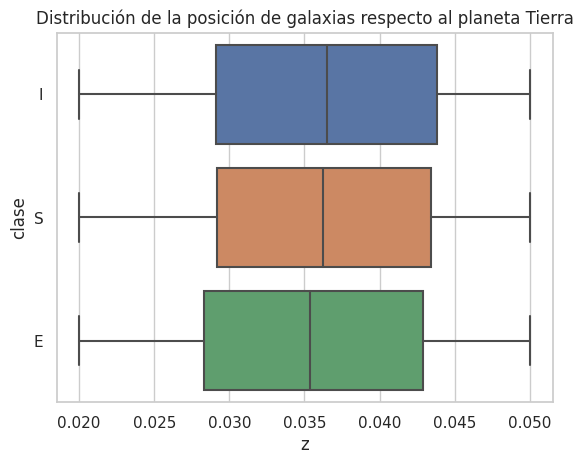

In [23]:
sns.boxplot(data=data, x='z', y='clase')
plt.ticklabel_format(style='plain', axis='x')
plt.title('Distribución de la posición de galaxias respecto al planeta Tierra')
plt.show()

No tienen la misma media ninguna y tampoco muy parecidas, sus intevalos de confianza no se superponen.


**Aproximacion de distancia actual* de las galaxias en años luz**

Ley de Hubble: ${\displaystyle z={\frac {\lambda _{1}-\lambda _{2}}{\lambda _{2}}}={\frac {H_{0}}{c}}D}$

$c=3e5$ [km/s]

$h_o=73,52$ [km/s/Mpc] constante de Hubble actual

$1$Mpc $=3,26$ años luz


*Referencia: https://es.wikipedia.org/wiki/Ley_de_Hubble-Lema%C3%AEtre#Constante_de_Hubble*

In [24]:
def distancia(z,c=3e5, h_0=73.52):
  D = z*c/h_0*3.26  # en años luz
  return D

In [25]:
media_clase = data.groupby('clase')['z'].mean()
print('Distancia actuales* promedio en años luz de galaxias tipo E, S, I:')
distancia(media_clase['E']), distancia(media_clase['S']), distancia(media_clase['I'])

Distancia actuales* promedio en años luz de galaxias tipo E, S, I:


(471.4573554376259, 479.960357168754, 481.5288995377213)

Prueba por hipótesis de Kruskal-Wallis, para distribuciones uniformes, de lo dicho antes.

In [26]:
from scipy.stats import kruskal

# Realiza la prueba de Kruskal-Wallis
statistic, p_value = kruskal(galaxy_s['z'], galaxy_i['z'])

print("Valor de estadístico de prueba:", statistic)
print("Valor p:", p_value)

if p_value < 0.05:
    print("Se rechaza la hipótesis nula. Hay diferencias significativas entre al menos dos grupos.")
else:
    print("No se puede rechazar la hipótesis nula. No hay diferencias significativas entre los grupos.")

Valor de estadístico de prueba: nan
Valor p: nan
No se puede rechazar la hipótesis nula. No hay diferencias significativas entre los grupos.


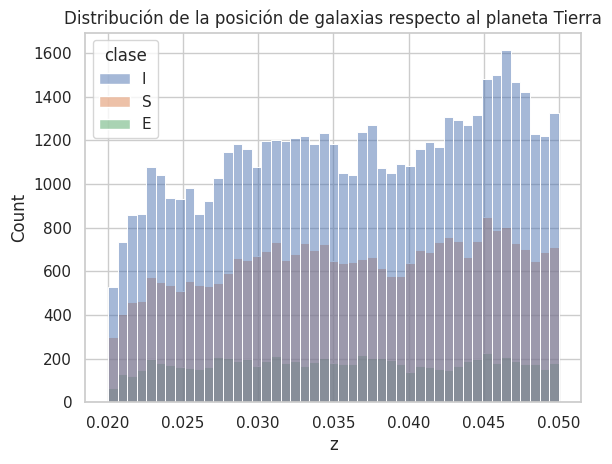

In [27]:
sns.histplot(data=data, x='z', hue='clase')
plt.title('Distribución de la posición de galaxias respecto al planeta Tierra')
plt.show()

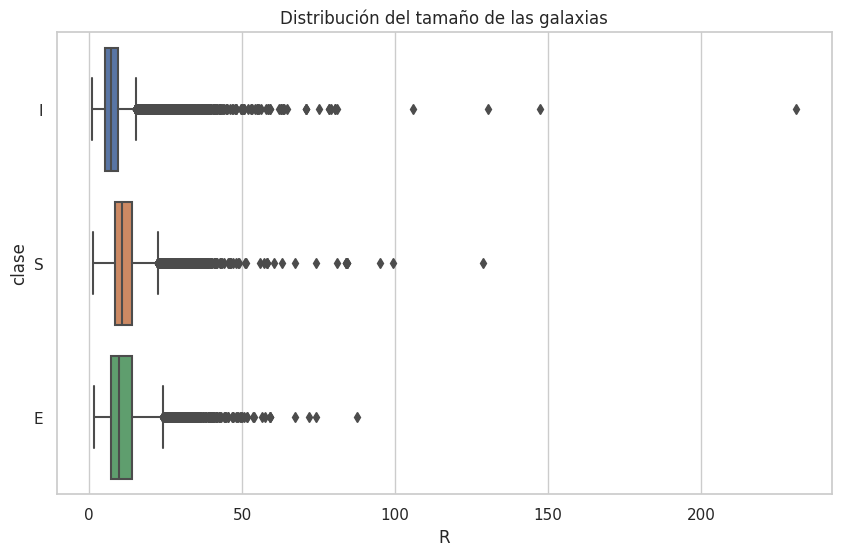

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='R', y='clase')
plt.ticklabel_format(style='plain', axis='x')
plt.title('Distribución del tamaño de las galaxias')
plt.show()

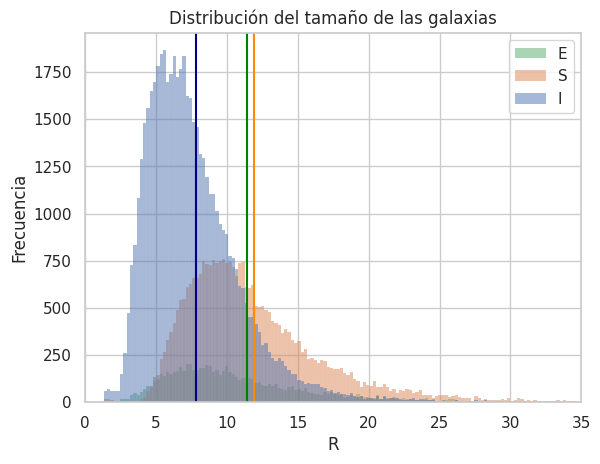

In [29]:
media_clase = data.groupby('clase')['R'].mean()

sns.set(style='whitegrid')
sns.histplot(data=data, x='R', hue='clase')
plt.legend(labels=['E', 'S', 'I'])

# Trazar una línea vertical para la media de cada clase
plt.axvline(x=media_clase['I'], color='darkblue')
plt.axvline(x=media_clase['S'], color='darkorange')
plt.axvline(x=media_clase['E'], color='green')

# Configurar límites del eje x
plt.xlim(0,35)

plt.title('Distribución del tamaño de las galaxias')
plt.ylabel('Frecuencia')

plt.show()

In [30]:
media_clase

clase
E    11.434267
I     7.788328
S    11.910286
Name: R, dtype: float64

## Analizando la variable color

Media = -2.636002217778854
Mediana = -2.672904
Desviación estandar = 0.34587483028926264


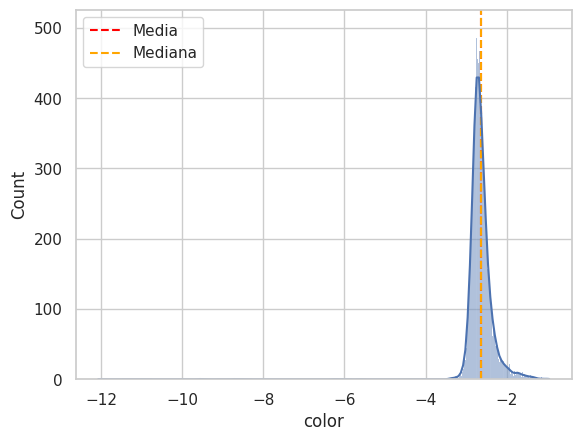

In [31]:
mean = galaxy_e['color'].mean()
mediana = galaxy_e['color'].median()
std = galaxy_e['color'].std()
print('Media =', mean)
print('Mediana =', mediana)
print('Desviación estandar =', std)

plt.axvline(mean, color='red', linestyle='--', label='Media')
plt.axvline(mean, color='orange', linestyle='--', label='Mediana')
sns.histplot(galaxy_e['color'], kde=True)

plt.legend()
plt.show()

<Axes: xlabel='color'>

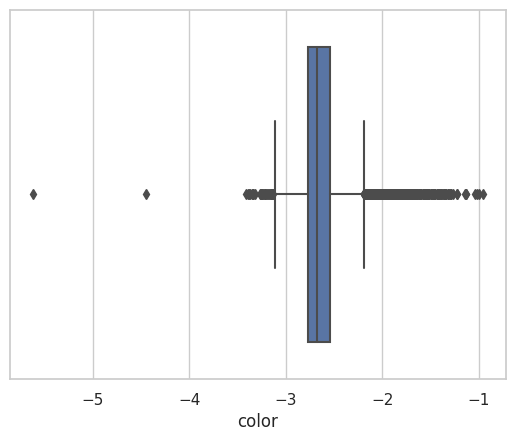

In [32]:
# Limpiando valores atipicos
galaxy_e2 = galaxy_e[(galaxy_e['color'] < 6) & (galaxy_e['color'] > -6)]
sns.boxplot(x='color', data=galaxy_e2)

Media = -2.6277333486781473
Mediana = -2.672495
Desviación estandar = 0.2516140038502038


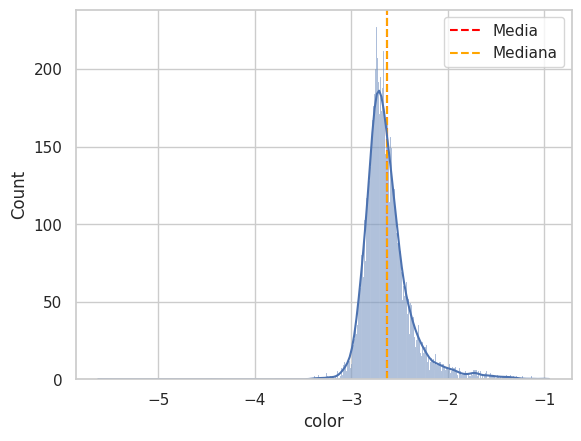

In [33]:
mean = galaxy_e2['color'].mean()
mediana = galaxy_e2['color'].median()
std = galaxy_e2['color'].std()
print('Media =', mean)
print('Mediana =', mediana)
print('Desviación estandar =', std)

plt.axvline(mean, color='red', linestyle='--', label='Media')
plt.axvline(mean, color='orange', linestyle='--', label='Mediana')
sns.histplot(galaxy_e2['color'], bins=500, kde=True)

plt.legend()
plt.show()

Media = -2.0261764770418695
Mediana = -1.953508
Desviación estandar = 0.5185644277550522


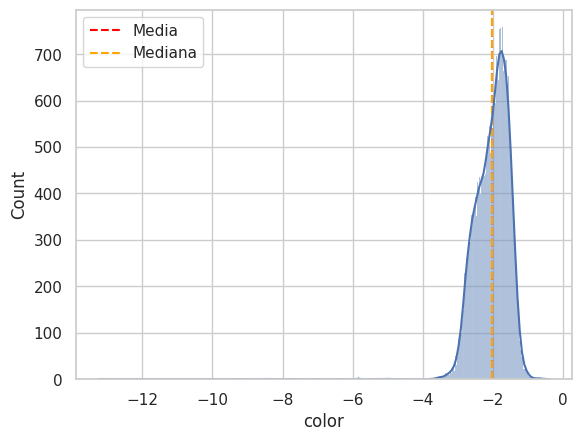

In [34]:
mean = galaxy_s['color'].mean()
mediana = galaxy_s['color'].median()
std = galaxy_s['color'].std()
print('Media =', mean)
print('Mediana =', mediana)
print('Desviación estandar =', std)

plt.axvline(mean, color='red', linestyle='--', label='Media')
plt.axvline(mean, color='orange', linestyle='--', label='Mediana')
sns.histplot(galaxy_s['color'], bins=500, kde=True)

plt.legend()
plt.show()

<Axes: xlabel='color'>

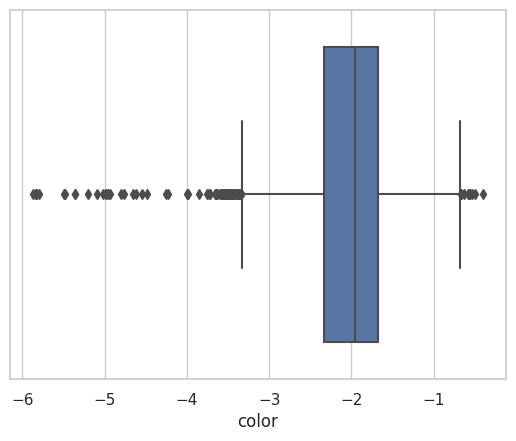

In [35]:
# Limpiando valores atipicos
galaxy_s2 = galaxy_s[(galaxy_s['color'] < 6) & (galaxy_s['color'] > -6)]
sns.boxplot(x='color', data=galaxy_s2)

Media = -2.0164870638712045
Mediana = -1.952817
Desviación estandar = 0.4490384814527051


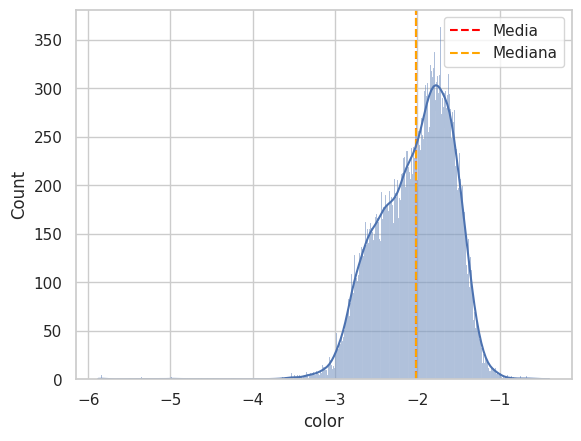

In [36]:
mean = galaxy_s2['color'].mean()
mediana = galaxy_s2['color'].median()
std = galaxy_s2['color'].std()
print('Media =', mean)
print('Mediana =', mediana)
print('Desviación estandar =', std)

plt.axvline(mean, color='red', linestyle='--', label='Media')
plt.axvline(mean, color='orange', linestyle='--', label='Mediana')
sns.histplot(galaxy_s2['color'], bins=500, kde=True)

plt.legend()
plt.show()

Media = -1.59798691562148
Mediana = -1.87285
Desviación estandar = 61.08283044566322


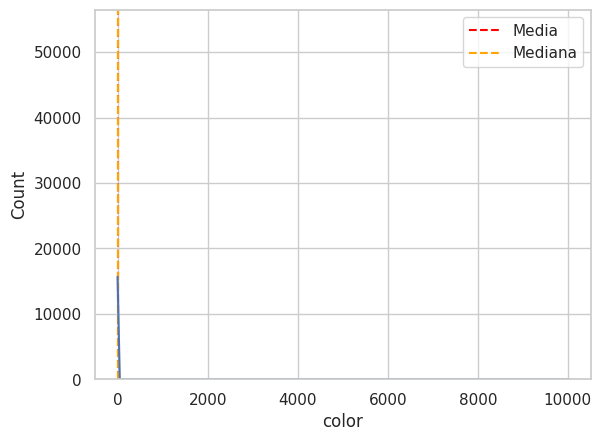

In [37]:
mean = galaxy_i['color'].mean()
mediana = galaxy_i['color'].median()
std = galaxy_i['color'].std()
print('Media =', mean)
print('Mediana =', mediana)
print('Desviación estandar =', std)

plt.axvline(mean, color='red', linestyle='--', label='Media')
plt.axvline(mean, color='orange', linestyle='--', label='Mediana')
sns.histplot(galaxy_i['color'], bins=500, kde=True)

plt.legend()
plt.show()

<Axes: xlabel='color'>

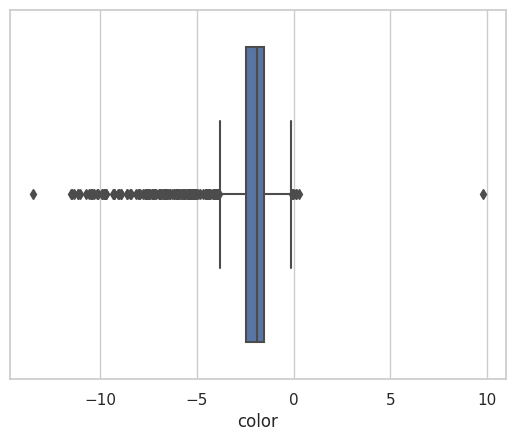

In [38]:
# Limpiamos el valor 10000
galaxy_i2 = galaxy_i[(galaxy_i['color'] < 1000)]
sns.boxplot(x='color', data=galaxy_i2)

<Axes: xlabel='color'>

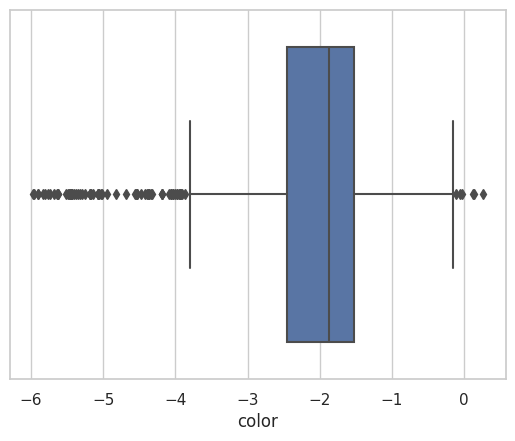

In [39]:
# Seguimos de limpieza
galaxy_i2 = galaxy_i2[(galaxy_i2['color'] < 6) & (galaxy_i2['color'] > -6)]
sns.boxplot(x='color', data=galaxy_i2)

Media = -1.9603253863881287
Mediana = -1.871166
Desviación estandar = 0.5470174143964762


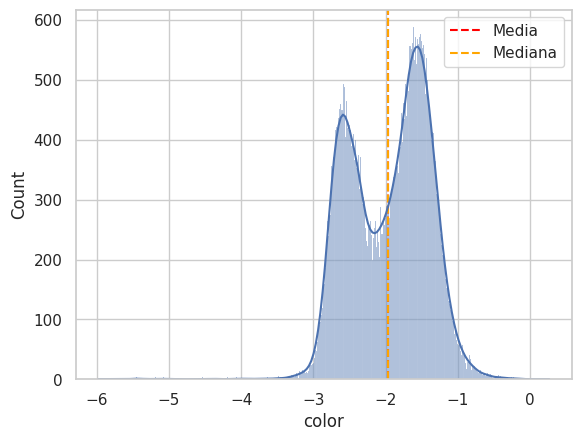

In [40]:
mean = galaxy_i2['color'].mean()
mediana = galaxy_i2['color'].median()
std = galaxy_i2['color'].std()
print('Media =', mean)
print('Mediana =', mediana)
print('Desviación estandar =', std)

plt.axvline(mean, color='red', linestyle='--', label='Media')
plt.axvline(mean, color='orange', linestyle='--', label='Mediana')
sns.histplot(galaxy_i2['color'], bins=500, kde=True)

plt.legend()
plt.show()

In [41]:
# Datos sin limpieza
datos_sin_limpieza = {'Estado': ['Sin limpieza'],'Media': [-1.59798691562148],'Mediana': [-1.87285],'Desviación estándar': [61.08283044566322]}

# Datos con limpieza
datos_con_limpieza = {'Estado': ['Con limpieza'],'Media': [-1.9603253863881287],'Mediana': [-1.871166],'Desviación estándar': [0.5470174143964762]}

df = pd.concat([pd.DataFrame(datos_sin_limpieza), pd.DataFrame(datos_con_limpieza)])
df

,Estado,Media,Mediana,Desviación estándar
0,Sin limpieza,-1.597987,-1.872850,61.082830
0,Con limpieza,-1.960325,-1.871166,0.547017


En el último caso para galaxias irregulares se puede ver como los valores atípicos alteran los estadisticos de media y desviación estandar. Por otro lado la media es una buena representacion para todos los datos.

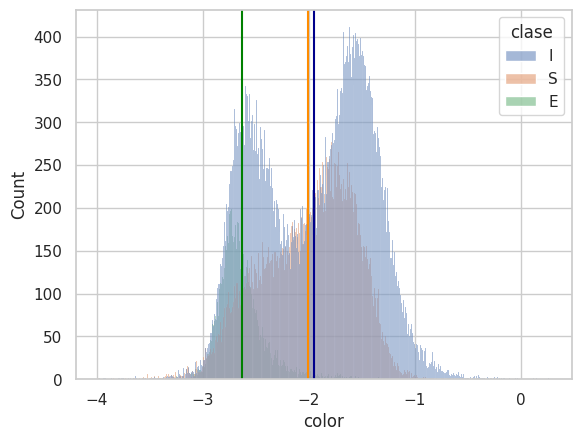

In [42]:
data_crop = data[(data["color"]<2) & (data["color"]>-4)]

media_color = data_crop.groupby('clase')['color'].mean()

plt.axvline(x=media_color['I'], color='darkblue')
plt.axvline(x=media_color['S'], color='darkorange')
plt.axvline(x=media_color['E'], color='green')

sns.histplot(data=data_crop, x='color', bins=500, hue="clase")
plt.show()

## Examinación de distribuciones de probabilidades discretas y continuas

- Probabilidad marginal de cada tipo morfologico y grafiquela.
- Pprobabilidad conjunta las galaxias de clase = E con el color  mayor a -2.1
- Correlación entre dos de las variables a través de chi-cuadrado. Muestra de esta correlación a través de mapas de calor.

In [43]:
morfologias = ['eliptica', 'espiral', 'irregular']
probabilidad_marginal = data[morfologias].sum() / len(data)

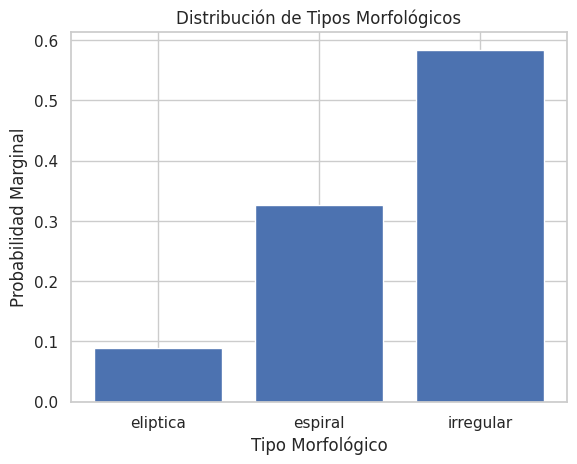

In [44]:
plt.bar(morfologias, probabilidad_marginal)
plt.xlabel('Tipo Morfológico')
plt.ylabel('Probabilidad Marginal')
plt.title('Distribución de Tipos Morfológicos')
plt.show()

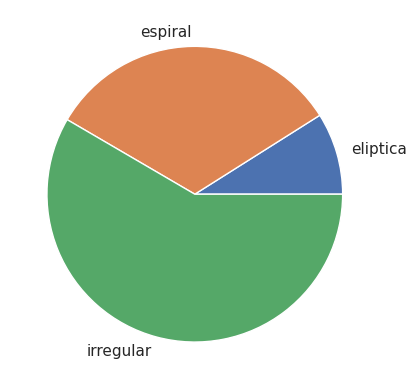

In [45]:
plt.pie(probabilidad_marginal, labels=morfologias)
plt.show()

In [46]:
color_21 = len(galaxy_e[galaxy_e['color'] > -2.1])
color_total = len(galaxy_e)

In [47]:
probabilidad_conjunta = (color_21 / color_total) * 100
print(f"La probabilidad conjunta es: {round(probabilidad_conjunta, 2)} %")

La probabilidad conjunta es: 0.36 %


Se han truncado las últimas 5000 líneas del flujo de salida.
Línea 87103: azul
Línea 87104: rojo
Línea 87105: azul
Línea 87106: azul
Línea 87107: azul
Línea 87108: azul
Línea 87109: azul
Línea 87110: rojo
Línea 87111: rojo
Línea 87112: azul
Línea 87113: azul
Línea 87114: azul
Línea 87115: azul
Línea 87116: azul
Línea 87117: azul
Línea 87118: azul
Línea 87119: rojo
Línea 87120: azul
Línea 87121: rojo
Línea 87122: azul
Línea 87123: azul
Línea 87124: rojo
Línea 87125: azul
Línea 87126: azul
Línea 87127: azul
Línea 87128: azul
Línea 87129: azul
Línea 87130: azul
Línea 87131: rojo
Línea 87132: rojo
Línea 87133: rojo
Línea 87134: rojo
Línea 87135: rojo
Línea 87136: azul
Línea 87137: azul
Línea 87138: azul
Línea 87139: azul
Línea 87140: rojo
Línea 87141: rojo
Línea 87142: rojo
Línea 87143: rojo
Línea 87144: rojo
Línea 87145: azul
Línea 87146: azul
Línea 87147: azul
Línea 87148: rojo
Línea 87149: azul
Línea 87150: rojo
Línea 87151: rojo
Línea 87152: azul
Línea 87153: azul
Línea 87154: rojo
Lín

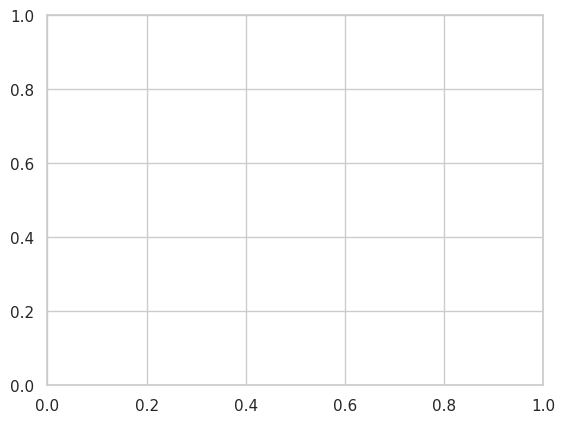

In [48]:
import matplotlib.colors as mcolors
vmin = min(data["color"])
vmax = max(data["color"])
color_min = 'red'
color_max = 'blue'
umbral = -2.1

cmap_custom = mcolors.LinearSegmentedColormap.from_list('custom_cmap', [color_min, color_max])

fig, ax = plt.subplots()
etiquetas = []

for i, valor in enumerate(data["color"]):
    etiqueta = 'rojo' if valor <= umbral else 'azul'
    etiquetas.append(etiqueta)

    print(f"Línea {i + 1}: {etiqueta}")
data["color_str"] = etiquetas

In [49]:
import scipy.stats
variable1 = 'color_str'
variable2 = 'clase'

contingency_table = pd.crosstab(data[variable1], data[variable2])

In [50]:
chi2, p_value, _, _ = scipy.stats.chi2_contingency(contingency_table)

In [51]:
contingency_table = pd.crosstab(data['clase'], data['color_str'])

chi2, p_value, _, _ = chi2_contingency(contingency_table)

print(f"Test de Chi-cuadrado")
print(f"Valor de Chi-cuadrado: {chi2}")
print(f"Valor p: {p_value}")

Test de Chi-cuadrado
Valor de Chi-cuadrado: 9457.979744195989
Valor p: 0.0


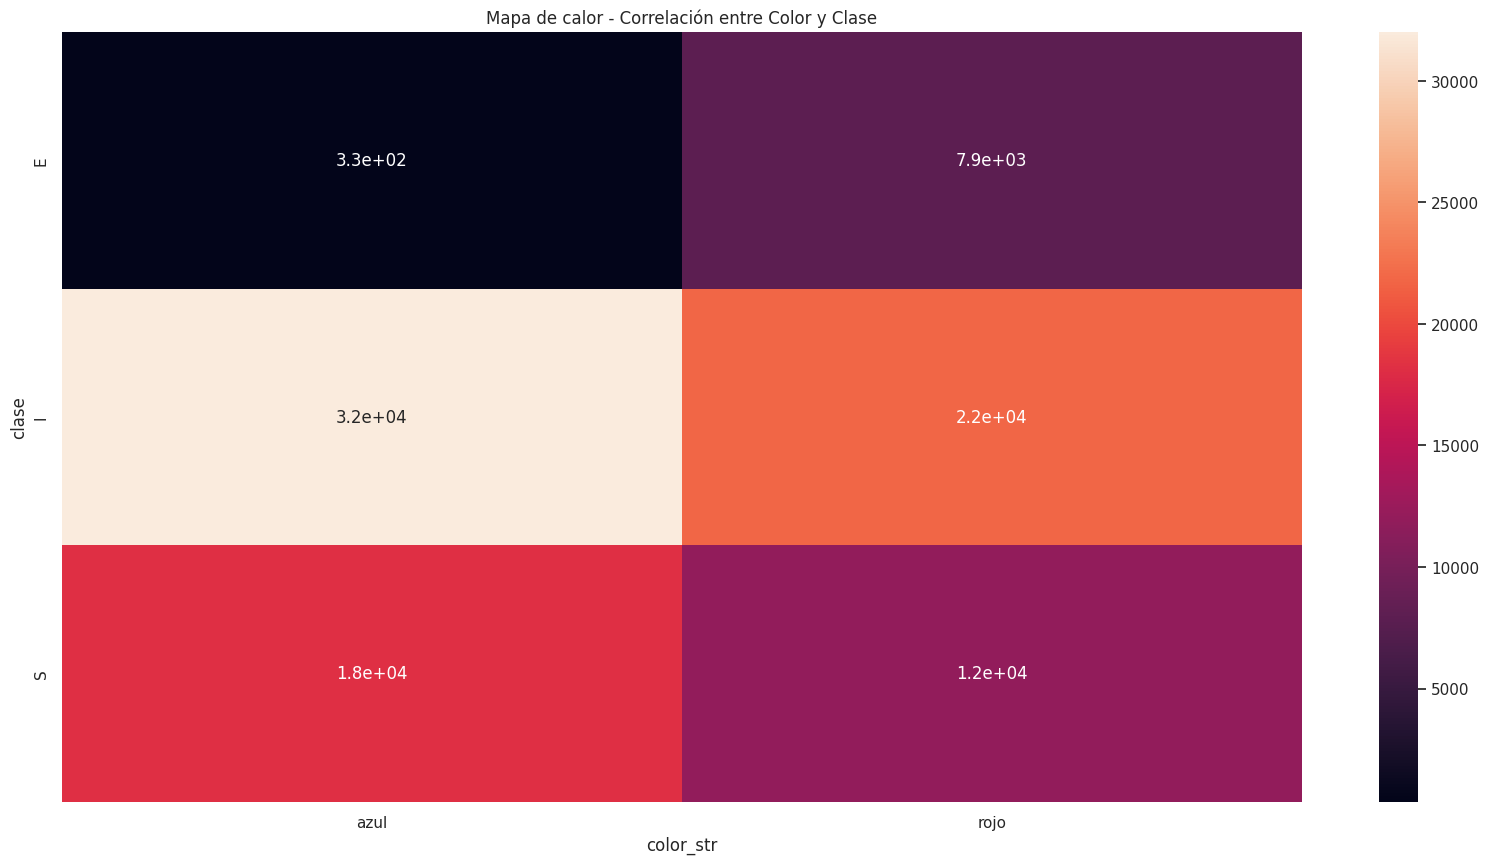

In [52]:
plt.figure(figsize=(20,10))
sns.heatmap(contingency_table, annot=True)

plt.title('Mapa de calor - Correlación entre Color y Clase')
plt.show()